In [32]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray


***Function to show our image at various steps of the implementation***

In [33]:
def show_img(img,bw=False):
    fig = plt.figure(figsize=(13,13))
    ax = fig.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.imshow(img,cmap="Greys_r")
    plt.show()

***Step 1:Convert image to grayScale***

In [34]:
img = imread('photo.jpg')
imggray = rgb2gray(img)

***Step 2: Spatial derivative calculation***

In [ ]:
from scipy import signal as sig
from scipy import ndimage as ndi
import numpy as np

def gradient_x(imggray):
    ##Sobel operator kernels.
    kernel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    return sig.convolve2d(imggray, kernel_x, mode='same')
def gradient_y(imggray):
    kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    return sig.convolve2d(imggray, kernel_y, mode='same')

I_x = gradient_x(imggray)
I_y = gradient_y(imggray)
show_img(I_x)
show_img(I_y)

Step 3: Structure tensor setup

In [ ]:
Ixx = ndi.gaussian_filter(I_x**2, sigma=1)
Ixy = ndi.gaussian_filter(I_x*I_y,sigma=1)
Iyy = ndi.gaussian_filter(I_y**2, sigma=1)
show_img(Ixx)
show_img(Iyy)
show_img(Ixy)


In [37]:
k = 0.05
detA = Ixx*Iyy - Ixy**2
traceA = Ixx + Iyy
harris_response = detA - k * traceA**2
harris_response_range = harris_response.max() - harris_response.min()
harris_response.shape

(1000, 1000)

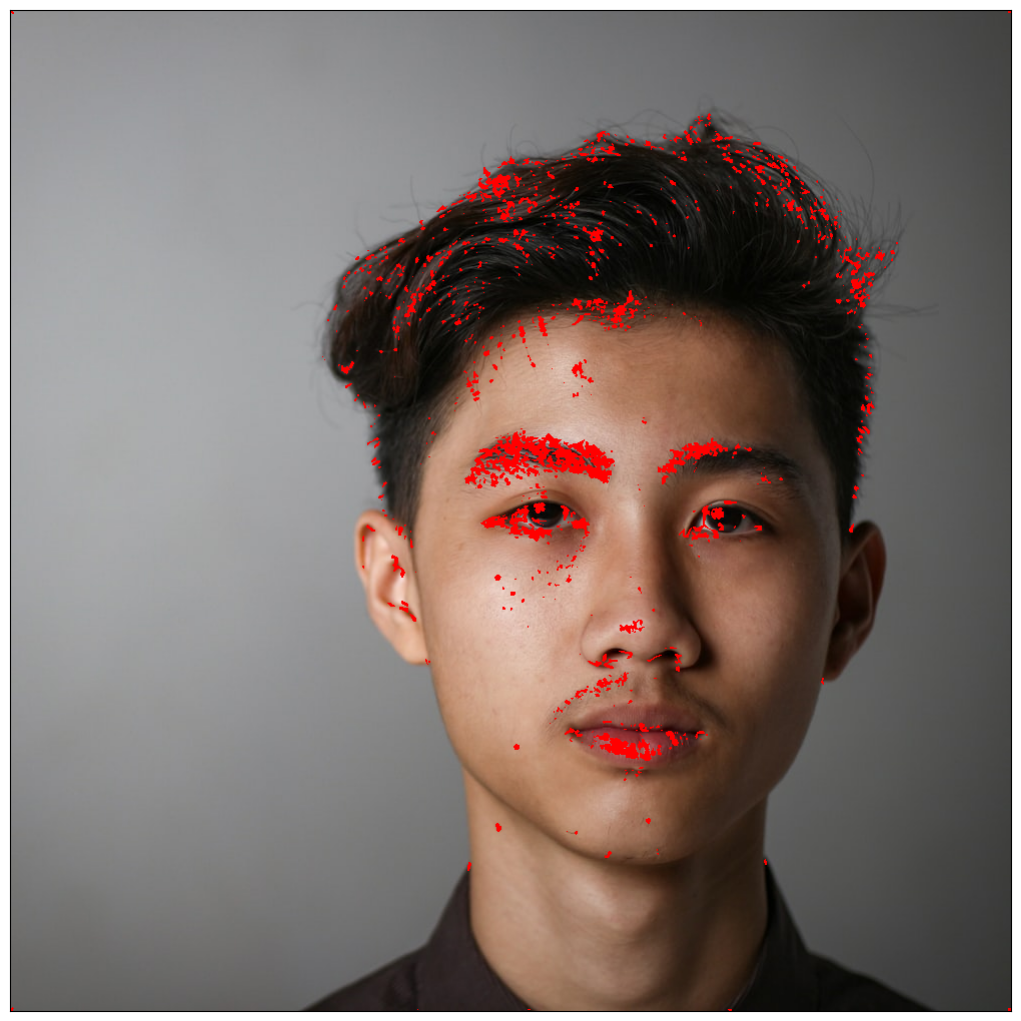

In [38]:
scaled_response = (harris_response / harris_response_range)*255
harris_corners = np.copy(img)
harris_edges = np.copy(img)
h_max = harris_response.max()
h_min = harris_response.min()
threshold_corner = 0.00005
threshold_edge = 0.05

for y,row in enumerate(harris_response):
    for x,pixel in enumerate(row):
        if pixel >= h_max*threshold_corner:
            harris_corners[y,x] = [255,0,0]
        elif pixel <= h_min * threshold_edge:
           continue
show_img(harris_corners)
